# 0.1 Imports

In [192]:
import pandas  as pd
import seaborn as sns
import numpy   as np

from IPython.core.display        import HTML 
import matplotlib.pyplot         as plt

# 0.2 Helper Functions

In [193]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

In [194]:
%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

In [195]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Description

## 1.1 Loading data

In [222]:
df1= pd.read_csv ('/Users/adriele/Documents/repos/pa004/dataset/data.csv')

### 1.1.1 Rename columns

In [223]:
# Dropping Unnamed column
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

df1.columns = ['gender', 'age', 'region_code', 'policy_sales',
               'driving_license', 'vehicle_age', 'vehicle_damage',
               'previously_insured', 'annual_premium', 'vintage', 'response']



In [224]:
df1.head()


,gender,age,region_code,policy_sales,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Female,56,28.0,26.0,1,1-2 Year,Yes,0,32031.0,72,1
1,Female,47,35.0,124.0,1,1-2 Year,Yes,0,47576.0,46,1
2,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
3,Female,54,28.0,122.0,1,1-2 Year,No,0,38560.0,184,0
4,Female,49,3.0,152.0,1,1-2 Year,No,1,25553.0,130,0


## 1.2 Data Dimensions

In [225]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 11
Number of Rows 131948


## 1.3 Check NA

In [226]:
df1.isna().sum()

gender                0
age                   0
region_code           0
policy_sales          0
driving_license       0
vehicle_age           0
vehicle_damage        0
previously_insured    0
annual_premium        0
vintage               0
response              0
dtype: int64

## 1.4 Check Data Types

In [227]:
df1.dtypes

gender                 object
age                     int64
region_code           float64
policy_sales          float64
driving_license         int64
vehicle_age            object
vehicle_damage         object
previously_insured      int64
annual_premium        float64
vintage                 int64
response                int64
dtype: object

In [228]:
df1.head()

,gender,age,region_code,policy_sales,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Female,56,28.0,26.0,1,1-2 Year,Yes,0,32031.0,72,1
1,Female,47,35.0,124.0,1,1-2 Year,Yes,0,47576.0,46,1
2,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0
3,Female,54,28.0,122.0,1,1-2 Year,No,0,38560.0,184,0
4,Female,49,3.0,152.0,1,1-2 Year,No,1,25553.0,130,0


## 1.5 Changing Types

In [229]:
df1['vehicle_age'] = df1[ 'vehicle_age'].str.replace('Year', '')
df1['vehicle_age'] = df1[ 'vehicle_age'].str.replace('s', '')
df1['vehicle_age'] = df1[ 'vehicle_age'].str.replace('> 2', '3')
df1['vehicle_age'] = df1[ 'vehicle_age'].str.replace('1-2', '2')
df1['vehicle_age'] = df1[ 'vehicle_age'].str.replace('< 1', '1')



In [206]:
df1.dtypes

gender                 object
age                     int64
region_code           float64
policy_sales          float64
driving_license         int64
vehicle_age            object
vehicle_damage         object
previously_insured      int64
annual_premium        float64
vintage                 int64
response                int64
dtype: object

In [207]:

df1['vehicle_age'] = df1[ 'vehicle_age' ].astype( int )
df1.dtypes


/var/folders/pc/6sglrsq96ws5kp74fjj4j02h0000gn/T/ipykernel_79655/3208589315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vehicle_age'] = df1[ 'vehicle_age' ].astype( int )


gender                 object
age                     int64
region_code           float64
policy_sales          float64
driving_license         int64
vehicle_age             int64
vehicle_damage         object
previously_insured      int64
annual_premium        float64
vintage                 int64
response                int64
dtype: object

## 1.6 Descriptive Startistical 

In [208]:
num_attributes = df1.select_dtypes ( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes ( exclude = ['int64', 'float64'] )

### 1.6.1 Numerical Atributes

In [209]:

# Central tedency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply ( np.median ) ).T

# Dispersin - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min () )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew () )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis () ) ).T

n = pd.concat([ d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
n.columns = [ 'atributtes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis' ]
n

,atributtes,min,max,range,mean,median,std,skew,kurtosis
0,age,45.0,85.0,40.0,56.939635,55.0,9.469115,0.640036,-0.649460
1,region_code,0.0,52.0,52.0,26.985388,28.0,12.310347,-0.209233,-0.407361
2,policy_sales,1.0,163.0,162.0,74.217237,30.0,53.440006,0.200884,-1.768637
3,driving_license,0.0,1.0,1.0,0.994096,1.0,0.076609,-12.899263,164.393472
4,vehicle_age,1.0,3.0,2.0,2.095621,2.0,0.306315,2.360071,5.155412
5,previously_insured,0.0,1.0,1.0,0.313427,0.0,0.463886,0.804403,-1.352957
6,annual_premium,2630.0,540165.0,537535.0,32301.524040,34034.5,19160.604775,1.920845,36.133813
7,vintage,10.0,299.0,289.0,154.276010,154.0,83.644379,0.001730,-1.201913
8,response,0.0,1.0,1.0,0.159517,0.0,0.366158,1.859780,1.458803


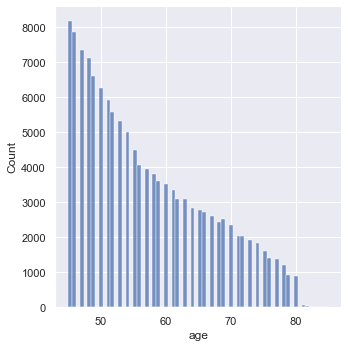

In [210]:
sns.displot( df1['age'])

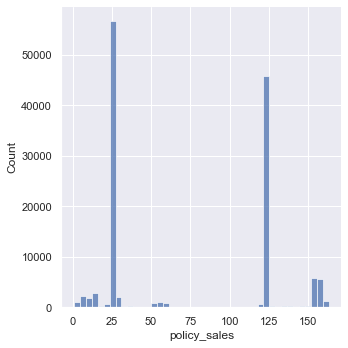

In [212]:
sns.displot( df1['policy_sales'])

### 1.6.2 Attributes Category

In [189]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender            2
vehicle_damage    2
dtype: int64

<AxesSubplot:xlabel='vehicle_damage', ylabel='annual_premium'>

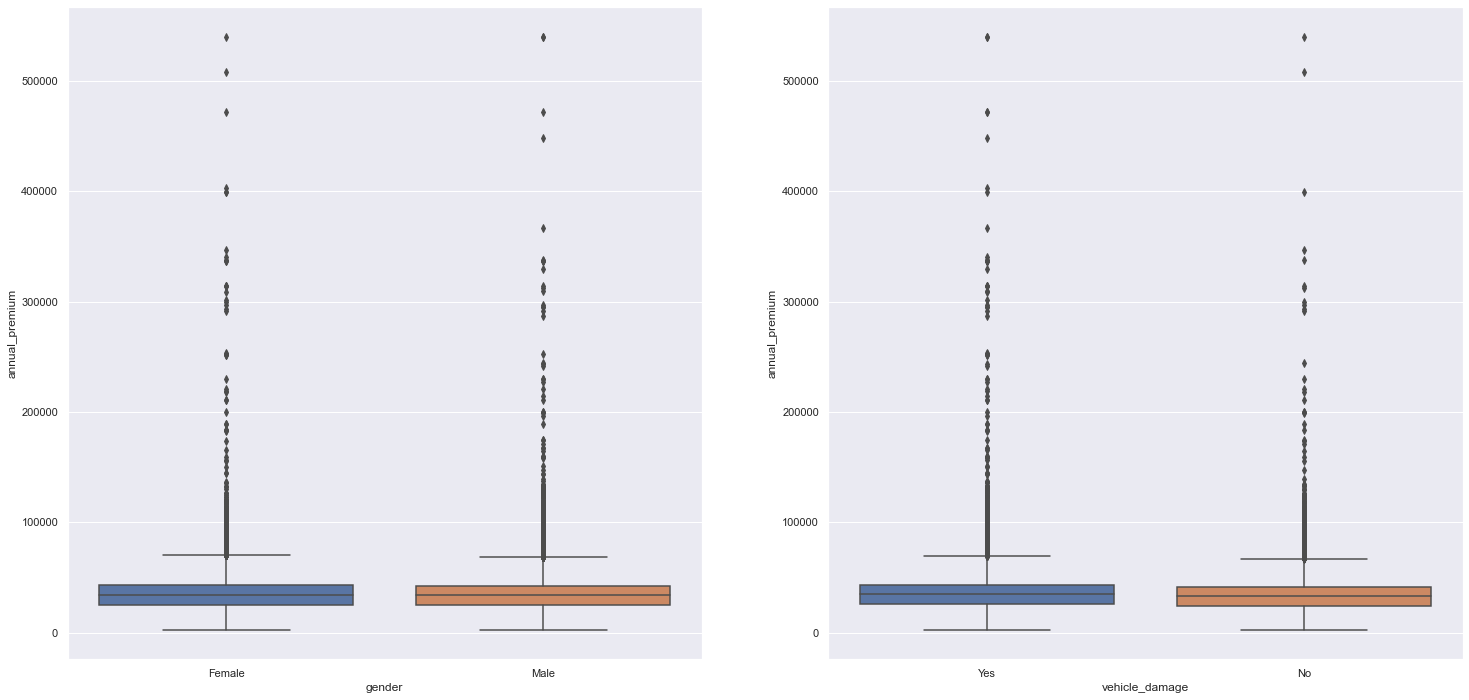

In [234]:
aux1 = df1[( df1[ 'gender' ] != '0') & (df1[ 'annual_premium' ] >0 )]

plt.subplot (1, 2, 1)
sns.boxplot (x = 'gender', y='annual_premium', data = aux1)

plt.subplot (1, 2, 2)
sns.boxplot (x = 'vehicle_damage', y='annual_premium', data = aux1)

# 2.0 Feature Engeneering - Mind Map

In [231]:
df1.head(50)

,gender,age,region_code,policy_sales,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,Female,56,28.0,26.0,1,2,Yes,0,32031.0,72,1
1,Female,47,35.0,124.0,1,2,Yes,0,47576.0,46,1
2,Male,45,8.0,124.0,1,2,Yes,0,42297.0,264,0
3,Female,54,28.0,122.0,1,2,No,0,38560.0,184,0
4,Female,49,3.0,152.0,1,2,No,1,25553.0,130,0
5,Male,54,28.0,26.0,1,2,Yes,0,25205.0,283,1
6,Male,54,26.0,22.0,1,2,Yes,0,35493.0,74,0
7,Male,77,28.0,124.0,1,2,Yes,0,36099.0,139,0
8,Male,50,30.0,26.0,1,2,Yes,0,34271.0,229,1
9,Male,49,28.0,124.0,1,2,Yes,0,2630.0,88,0


# Hypothesy List

- H1. Customers over 50 years old would be insterested.
- H2. Customers with more time of association on Health Insurance would be insterested.
- H3. Customers with older car wouldn't be insterested.
- H4. Customers demage car would be insterested.
- H5. Customers around downtown would be insterested.
- H6. Female customers old would be insterested.
- H7. Customers that paid for annually premmiun would be insterested.
- H8. Customers withougt drive licenses wouldn't be insterested.
- H9. Customers with demage car paid the most expensive annualy premium.
- H10. 60% of Customers would be insterested.